#### CSC 180 Intelligent Systems 

#### William Lorence, Ajaydeep Singh, Romin Akoliya, Abdurraziq Paikur

#### California State University, Sacramento

# Project 4: Time Series Forecasting

## Creating the Dataframe

In [267]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#load data
AAPL_path = "./AAPL.csv"

df = pd.read_csv(AAPL_path)

print(AAPL_path)
print(df.head())

./AAPL.csv
         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.023186  117258400.0
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.021977   43971200.0
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.020364   26432000.0
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.020868   21610400.0
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.021473   18362400.0


In [268]:
# filter out dropping Date and Adj Close 

df_filtered = df.drop(columns=['Date', 'Adj Close'])
print("First 5 rows of the filtered data:")
print(df_filtered.head())

First 5 rows of the filtered data:
       Open      High       Low     Close       Volume
0  0.513393  0.515625  0.513393  0.513393  117258400.0
1  0.488839  0.488839  0.486607  0.486607   43971200.0
2  0.453125  0.453125  0.450893  0.450893   26432000.0
3  0.462054  0.464286  0.462054  0.462054   21610400.0
4  0.475446  0.477679  0.475446  0.475446   18362400.0


In [269]:
# drop rows with NaN values

df_filtered = df_filtered.dropna()

In [270]:
close = df_filtered['Close'].tolist()
close[0:5]

[0.513393, 0.486607, 0.450893, 0.462054, 0.475446]

## Normalizing Input Features

In [271]:
df_scaled = (df_filtered - df_filtered.mean()) / df_filtered.std()

# Confirm the normalization
print("Sample of scaled data (first 5 rows):")
df_scaled[0:5]

Sample of scaled data (first 5 rows):


,Open,High,Low,Close,Volume
0,-0.547665,-0.548357,-0.546670,-0.547549,0.339526
1,-0.548200,-0.548935,-0.547258,-0.548132,-0.503884
2,-0.548977,-0.549706,-0.548042,-0.548909,-0.705730
3,-0.548782,-0.549465,-0.547797,-0.548666,-0.761218
4,-0.548491,-0.549176,-0.547503,-0.548374,-0.798597


## Creating Windows to Send Data Properly

In [272]:
def to_sequences(SEQUENCE_SIZE, data, output):
    x = []
    y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = data.iloc[i:i + SEQUENCE_SIZE].values.flatten()
        after_window = output[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [273]:
SEQUENCE_SIZE = 7
X,y = to_sequences(SEQUENCE_SIZE, df_scaled, close)

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

X[0:5]

Shape of X: (9547, 35, 1)
Shape of y: (9547,)


array([[[-0.54766515],
        [-0.54835724],
        [-0.54667033],
        [-0.54754873],
        [ 0.33952598],
        [-0.54819953],
        [-0.54893537],
        [-0.54725828],
        [-0.5481316 ],
        [-0.50388387],
        [-0.5489768 ],
        [-0.54970621],
        [-0.5480422 ],
        [-0.54890874],
        [-0.70572994],
        [-0.54878248],
        [-0.54946531],
        [-0.54779722],
        [-0.54866587],
        [-0.76121828],
        [-0.54849102],
        [-0.54917625],
        [-0.54750326],
        [-0.54837446],
        [-0.79859718],
        [-0.54785948],
        [-0.54854996],
        [-0.54686632],
        [-0.54774303],
        [-0.87000378],
        [-0.54732509],
        [-0.54801999],
        [-0.54632737],
        [-0.54720873],
        [-0.90242031]],

       [[-0.54819953],
        [-0.54893537],
        [-0.54725828],
        [-0.5481316 ],
        [-0.50388387],
        [-0.5489768 ],
        [-0.54970621],
        [-0.5480422 ],
        [

In [274]:
y[0:5]

array([0.551339, 0.580357, 0.633929, 0.642857, 0.627232])

## Data Splitting and Preparation

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1249)

print("Training set has {} records.".format(len(X_train)))
print("Test set has {} records.".format(len(X_test)))
print("")
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Training set has 6682 records.
Test set has 2865 records.

Shape of X_train: (6682, 35, 1)
Shape of y_train: (6682,)
Shape of X_test: (2865, 35, 1)
Shape of y_test: (2865,)


In [276]:
X_train[0:5]

array([[[-0.55271744],
        [-0.5533677 ],
        [-0.5521088 ],
        [-0.55294018],
        [ 0.08199822],
        [-0.5530575 ],
        [-0.55341588],
        [-0.55215779],
        [-0.55298875],
        [ 0.61754768],
        [-0.5530575 ],
        [-0.55370495],
        [-0.5521088 ],
        [-0.55294018],
        [-0.32994307],
        [-0.55291177],
        [-0.55351223],
        [-0.55196182],
        [-0.55279448],
        [-0.24687168],
        [-0.55276602],
        [-0.5533677 ],
        [-0.55181482],
        [-0.55264875],
        [-0.51509754],
        [-0.55271744],
        [-0.55341588],
        [-0.55176583],
        [-0.55260018],
        [-0.46096257],
        [-0.55257171],
        [-0.55312681],
        [-0.55161886],
        [-0.55245448],
        [-0.53191804]],

       [[-0.54926828],
        [-0.54965803],
        [-0.54843416],
        [-0.54890874],
        [-0.5005971 ],
        [-0.54902538],
        [-0.54956168],
        [-0.54809119],
        [

In [277]:
y_train[0:5]

array([ 0.308036,  0.466518,  1.410714, 94.989998,  1.410714])

## Build the Fully-Connected Neural Network (FCNN)

In [278]:
# Define the FCNN model
model_fcnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

print(model_fcnn.summary())

# Compile the model
model_fcnn.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\legow\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_fcnn_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_fcnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Print training completion
print("FCNN model training complete.")


Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 1581.2285 - val_loss: 41.7669
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 34.1314 - val_loss: 24.3902
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 20.7658 - val_loss: 13.2690
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 10.9310 - val_loss: 5.1141
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 4.3952 - val_loss: 2.8993
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 2.8580 - val_loss: 2.1835
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 2.1544 - val_loss: 1.9151
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 2.1646 - val_loss: 1.7467
Epoch 9/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 1.7156 - val_loss: 1.8933
Epoch 10/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 1.6780 - val_loss: 2.1865
Epoch 11/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.6148 - val_loss: 1.5421
Epoch 12/50
209/209 ━

## Evaluate the Model and Plot the Regression Lift Chart

In [280]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred_fcnn = model_fcnn.predict([X_test])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
print(f"Root Mean Square Error (RMSE): {rmse}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
Root Mean Square Error (RMSE): 1.1496671687519657


Test RMSE: 1.1496671687519657


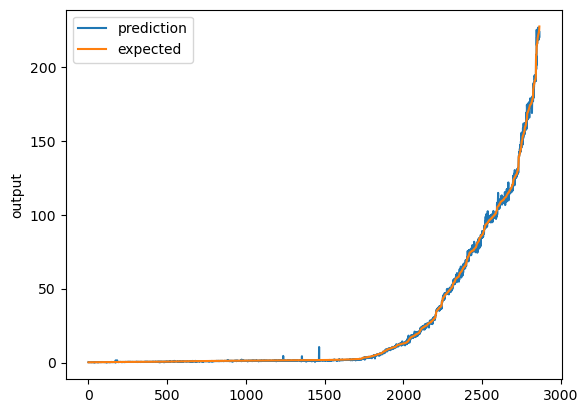

In [281]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
print("Test RMSE:", rmse)

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['pred'].tolist(),label='prediction')
    b = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

chart_regression(y_pred_fcnn.flatten(), y_test, sort=True)


## Build the Convolutional Neural Network (CNN)

In [282]:
# Define the CNN model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

# input model (CNN with images)
visible = Input(shape=(35, 1))
conv1 = Conv1D(128, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling1D(pool_size=(2))(conv1)
conv2 = Conv1D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=(2))(conv2)
flat = Flatten()(pool2)

# interpretation model
dense1 = Dense(64)(flat)
dense2 = Dense(32)(dense1)
output = Dense(1)(dense2)

# model creation
model_cnn = Model(inputs=visible, outputs=output)

# summarize layers
print(model_cnn.summary())

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 35, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 33, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 14, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,001 (218.75 KB)

 Trainable params: 56,001 (218.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Print training completion
print("CNN model training complete.")


Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 677.9431 - val_loss: 4.7114
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0259 - val_loss: 3.2822
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3221 - val_loss: 2.5802
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3209 - val_loss: 7.6776
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5055 - val_loss: 2.3480
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4343 - val_loss: 3.9809
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6896 - val_loss: 3.5451
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6270 - val_loss: 2.4449
Epoch 9/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4366 - val_loss: 3.0225
Epoch 10/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0959 - val_loss: 1.9901
Epoch 11/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8495 - val_loss: 3.1125
Epoch 12/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [284]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred_cnn = model_cnn.predict([X_test])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
print(f"Root Mean Square Error (RMSE): {rmse}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Root Mean Square Error (RMSE): 1.4107106337250495


Test RMSE: 1.4107106337250495


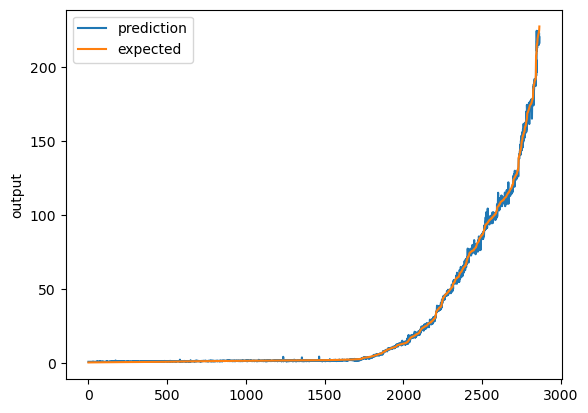

In [285]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
print("Test RMSE:", rmse)

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['pred'].tolist(),label='prediction')
    b = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

chart_regression(y_pred_cnn.flatten(), y_test, sort=True)

## Build the Long Short-Term Memory Model (LSTM)